In [103]:
pd.set_option('max_rows', 8, 'max_columns', 50)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [104]:
df = pd.read_csv('train.csv')

In [105]:
df_test = pd.read_csv('test.csv')
test_id = df_test['id']
df_test['date'] = df_test['date'].apply(lambda data: int(data[:8]))
df_test['waterfront'] = df_test['waterfront'].apply(lambda data: str(data))
df_test = pd.get_dummies(df_test)
df_test = df_test.drop('id', axis=1)

### Preprocessing

#### `price`

In [106]:
original_price = df['price']
df['price'] = np.log1p(df['price'])

#### `date`

In [107]:
def regex(data):
    pattern = re.compile('^[0-9]{8}T000000$')
    match = pattern.match(data)
    if match:
        return True
    else:
        return False

In [108]:
df['date'] = df['date'].apply(lambda data: int(data[:8]))

In [109]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013,12.309987,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225,12.100718,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218,13.142168,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627,12.458779,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115,12.583999,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### `waterfront`
- make waterfront category data

In [111]:
preprocessing_df = df
preprocessing_df['waterfront'] = preprocessing_df['waterfront'].apply(lambda data: str(data))
preprocessing_df = pd.get_dummies(preprocessing_df)

- `id` column drop

In [112]:
preprocessing_df = preprocessing_df.drop('id', axis=1)
preprocessing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_0,waterfront_1
0,20141013,12.309987,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0
1,20150225,12.100718,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1,0
2,20150218,13.142168,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1,0
3,20140627,12.458779,3,2.25,1715,6819,2.0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,1,0
4,20150115,12.583999,3,1.50,1060,9711,1.0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,1,0


### train, test split()

In [113]:
targets = preprocessing_df['price']
features = preprocessing_df.drop('price', axis=1)

In [114]:
train_set_features, test_set_features, train_set_target, test_set_target = train_test_split(features, targets, test_size = 0.2, random_state = 20190316)

In [115]:
train_set_features.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_0,waterfront_1
8144,20141009,4,1.75,1850,65340,1.5,0,4,7,1850,0,1972,0,98042,47.3468,-122.110,1750,40946,1,0
3355,20140522,3,1.75,1650,5100,1.0,0,5,7,1040,610,1908,0,98115,47.6873,-122.321,1540,5100,1,0
13760,20141023,3,2.00,1160,1174,2.0,0,3,7,790,370,2007,0,98106,47.5225,-122.357,1160,994,1,0
10214,20140523,4,2.50,1750,8476,1.0,0,4,7,1240,510,1983,0,98058,47.4447,-122.137,1660,7875,1,0
13747,20140909,5,4.00,3210,7200,2.0,0,3,8,2410,800,2011,0,98019,47.7329,-121.966,2750,7200,1,0


### Modeling1
### XGBRegressor + GridSearch

In [12]:
# from sklearn.model_selection import GridSearchCV
# xgb = XGBRegressor()
# parameters = {
#     'n_estimators': [500, 1000],
#     'learning_rate': [0.03, 0.05, 0.07, 0.1],
#     'colsample_bytree': [0.5, 0.7],
#     'subsample': [0.5, 0.7, 0.8],
    
# }
# xgb_grid = GridSearchCV(xgb, parameters, cv=5, n_jobs=5)
# xgb_grid.fit(features, targets)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [13]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.07, colsample_bytree=0.7, subsample=0.8)
xgb_reg.fit(train_set_features, train_set_target)
xgb_reg_predict = xgb_reg.predict(test_set_features)
xgb_mse = mean_squared_error(test_set_target, xgb_reg_predict)
print(np.sqrt(xgb_mse))

0.16273265455559738


/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['AppleMyungjo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


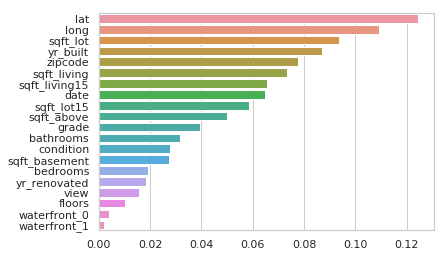

In [14]:
%matplotlib inline
feature_importance = pd.Series(data=xgb_reg.feature_importances_, index=features.columns)
feature_importance = feature_importance.sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)

### Preprocessing 2

In [15]:
preprocessing_df1 = preprocessing_df

### `yr_renovated` & `yr_built` -> `yr_combined`

In [16]:
preprocessing_df1['yr_combine'] = preprocessing_df1.apply(lambda df: max(df['yr_built'], df['yr_renovated']), axis=1)

In [17]:
preprocessing_df1 = preprocessing_df1.drop(['yr_built', 'yr_renovated'], axis=1)

In [18]:
targets = preprocessing_df1['price']
features = preprocessing_df1.drop('price', axis=1)

In [19]:
# from sklearn.model_selection import GridSearchCV
# xgb = XGBRegressor()
# parameters = {
#     'n_estimators': [500, 1000],
#     'learning_rate': [0.03, 0.05, 0.07, 0.1],
#     'colsample_bytree': [0.5, 0.7],
#     'subsample': [0.5, 0.7, 0.8],
    
# }
# xgb_grid = GridSearchCV(xgb, parameters, cv=5, n_jobs=5)
# xgb_grid.fit(features, targets)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [20]:
train_set_features, test_set_features, train_set_target, test_set_target = train_test_split(features, targets, test_size = 0.2, random_state = 20190316)

In [21]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.07, colsample_bytree=0.5, subsample=0.8)
xgb_reg.fit(train_set_features, train_set_target)
xgb_reg_predict = xgb_reg.predict(test_set_features)
xgb_mse = mean_squared_error(test_set_target, xgb_reg_predict)
print(np.sqrt(xgb_mse))

0.1637955172329864


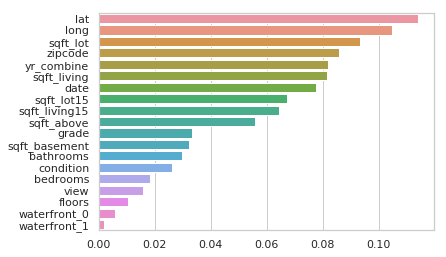

In [22]:
%matplotlib inline
feature_importance = pd.Series(data=xgb_reg.feature_importances_, index=features.columns)
feature_importance = feature_importance.sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)

### sqft_living15 삭제

In [23]:
preprocessing_df2 = preprocessing_df1
preprocessing_df2 = preprocessing_df2.drop('sqft_living15', axis=1)

In [24]:
targets = preprocessing_df2['price']
features = preprocessing_df2.drop('price', axis=1)

In [91]:
train_set_features, test_set_features, train_set_target, test_set_target = train_test_split(features, targets, test_size = 0.2, random_state = 20190316)

In [46]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.07, colsample_bytree=0.5, subsample=0.8)
xgb_reg.fit(train_set_features, train_set_target)
xgb_reg_predict = xgb_reg.predict(test_set_features)
xgb_mse = mean_squared_error(test_set_target, xgb_reg_predict)
print(np.sqrt(xgb_mse))

0.16394573994908979


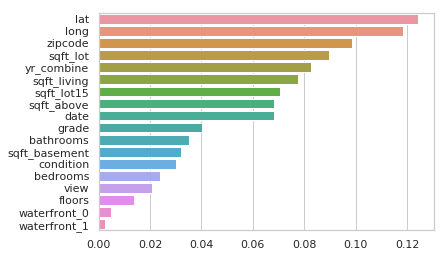

In [27]:
%matplotlib inline
feature_importance = pd.Series(data=xgb_reg.feature_importances_, index=features.columns)
feature_importance = feature_importance.sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)

### Modeling2
#### lightgbm

In [28]:
from lightgbm import LGBMRegressor

/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [44]:
targets = preprocessing_df['price']
features = preprocessing_df.drop('price', axis=1)

In [30]:
# from sklearn.model_selection import GridSearchCV
# lgbm = LGBMRegressor()
# parameters = {
#     'n_estimators': [500, 1000],
#     'learning_rate': [0.03, 0.05, 0.07, 0.1],
#     'colsample_bytree': [0.5, 0.7],
#     'subsample': [0.5, 0.7, 0.8],
#     'num_leaves': [10, 20, 30, 40]
    
# }
# lgbm_grid = GridSearchCV(lgbm, parameters, cv=5, n_jobs=5)
# lgbm_grid.fit(features, targets)

# print(lgbm_grid.best_score_)
# print(lgbm_grid.best_params_)

In [45]:
train_set_features, test_set_features, train_set_target, test_set_target = train_test_split(features, targets, test_size = 0.2, random_state = 20190316)
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.03, colsample_bytree=0.5, subsample=0.5, num_leaves=30)
lgbm.fit(train_set_features, train_set_target)
lgbm_predict = lgbm.predict(test_set_features)
lgbm_mse = mean_squared_error(test_set_target, lgbm_predict)
print(np.sqrt(lgbm_mse))

0.1598453758222571


In [116]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.07, colsample_bytree=0.7, subsample=0.8)
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.03, colsample_bytree=0.5, subsample=0.5, num_leaves=30)
xgb_reg.fit(train_set_features, train_set_target)
lgbm.fit(train_set_features, train_set_target)
lgbm_predict = lgbm.predict(test_set_features)
xgb_reg_predict = xgb_reg.predict(test_set_features)

ratio 0 : rmse 0.16273265455559738
ratio 0.01 : rmse 0.1626274498687394
ratio 0.02 : rmse 0.1625237833412113
ratio 0.03 : rmse 0.16242165931651414
ratio 0.04 : rmse 0.16232112100982354
ratio 0.05 : rmse 0.1622221001793391
ratio 0.060000000000000005 : rmse 0.16212463982049005
ratio 0.07 : rmse 0.16202873346621488
ratio 0.08 : rmse 0.1619343909495006
ratio 0.09 : rmse 0.16184160908356607
ratio 0.09999999999999999 : rmse 0.16175042423335634
ratio 0.10999999999999999 : rmse 0.16166077860037706
ratio 0.11999999999999998 : rmse 0.16157269396235466
ratio 0.12999999999999998 : rmse 0.16148619775021064
ratio 0.13999999999999999 : rmse 0.1614012791833781
ratio 0.15 : rmse 0.1613179251569167
ratio 0.16 : rmse 0.1612361974856777
ratio 0.17 : rmse 0.16115600924246024
ratio 0.18000000000000002 : rmse 0.16107741809532378
ratio 0.19000000000000003 : rmse 0.1610004032473489
ratio 0.20000000000000004 : rmse 0.1609249917042658
ratio 0.21000000000000005 : rmse 0.16085117989104203
ratio 0.22000000000000006

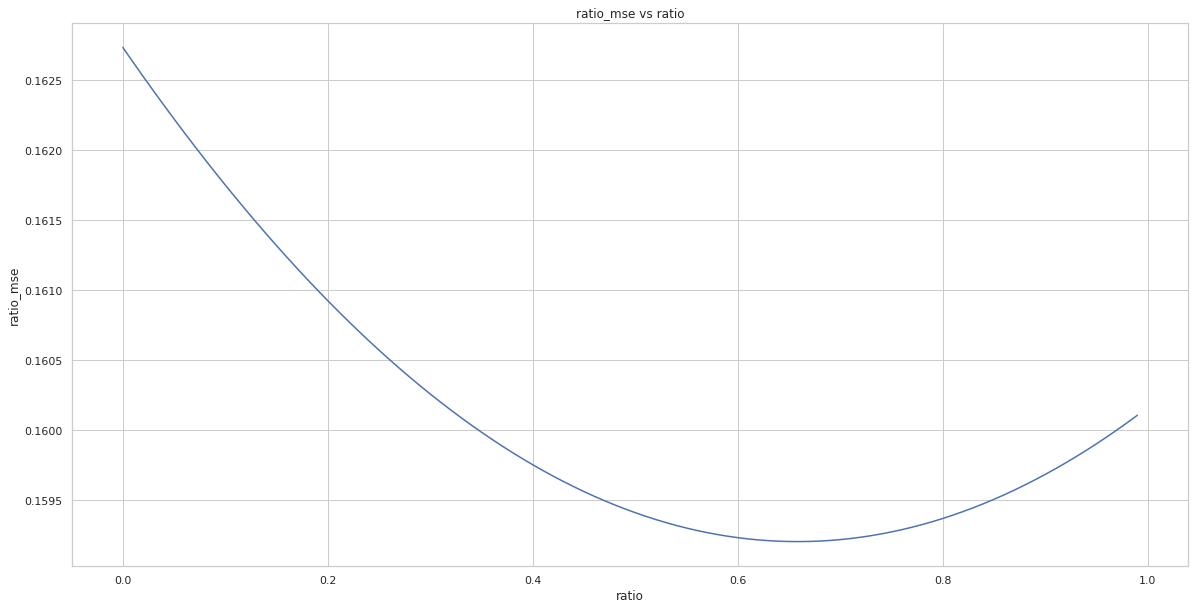

In [117]:
ratio = 0
ratio_result = []
result = []
while ratio < 1:
    ratio_predict = (ratio * lgbm_predict) + ((1 - ratio) * xgb_reg_predict)
    ratio_mse = mean_squared_error(test_set_target, ratio_predict)
    ratio_rmse = np.sqrt(ratio_mse)
    print("ratio {} : rmse {}".format(ratio, ratio_rmse))
    ratio_result.append(ratio)
    result.append(ratio_rmse)
    ratio += 0.01


plt.figure(figsize=(20, 10))
plt.title("ratio_mse vs ratio")
plt.xlabel("ratio")
plt.ylabel("ratio_mse")
plt.plot(ratio_result, result)
plt.show()

In [118]:
sorted(list(zip(ratio_result, result)), key=lambda x: x[1])

[(0.6600000000000004, 0.15920534879387452),
 (0.6500000000000004, 0.1592059309777919),
 (0.6700000000000004, 0.15920642354260783),
 (0.6400000000000003, 0.15920813786025123),
 (0.6800000000000004, 0.15920914859477328),
 (0.6300000000000003, 0.15921200424328294),
 (0.6900000000000004, 0.15921350905023549),
 (0.6200000000000003, 0.15921751062802414),
 (0.7000000000000004, 0.15921951350217223),
 (0.6100000000000003, 0.1592246670032664),
 (0.7100000000000004, 0.15922717044291382),
 (0.6000000000000003, 0.15923345470420114),
 (0.7200000000000004, 0.15923646713858977),
 (0.5900000000000003, 0.1592439008496272),
 (0.7300000000000004, 0.15924740425661574),
 (0.5800000000000003, 0.15925598969556756),
 (0.7400000000000004, 0.1592599954589007),
 (0.5700000000000003, 0.15926970771496882),
 (0.7500000000000004, 0.15927422032723823),
 (0.5600000000000003, 0.15928507585192966),
 (0.7600000000000005, 0.1592900945710997),
 (0.5500000000000003, 0.1593020970307764),
 (0.7700000000000005, 0.15930760352181

In [100]:
lgbm_predict = lgbm.predict(df_test)
xgb_reg_predict = xgb_reg.predict(df_test)
ratio = 0.66
ratio_predict = (ratio * lgbm_predict) + ((1 - ratio) * xgb_reg_predict)
ratio_predict = np.expm1(ratio_predict)

In [101]:
submission = pd.DataFrame({'id': test_id,
                          'price': ratio_predict})
submission.head()

,id,price
0,15035,5.128667e+05
1,15036,4.676324e+05
2,15037,1.380924e+06
3,15038,2.907668e+05
4,15039,3.188339e+05


In [102]:
submission.to_csv('./submission.csv', index=False)